<_io.TextIOWrapper name='../experiments_data/dft/chain_dft4.csv' mode='r' encoding='UTF-8'>


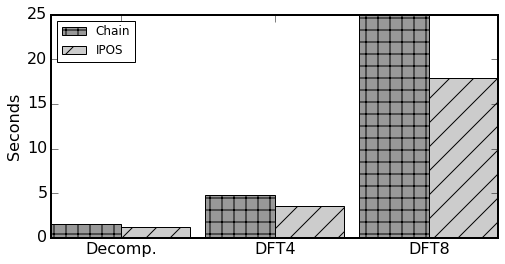

In [7]:
"""
Performance: IPOS versus Chain
    Metric : time
    Task   : Decompressing 100 bytes of data
    App    : data_decompression


@ Author  : Amjad Yousef Majid
@ Gmail ID: amjad.y.majid 
@ Date    : 20/May/2017 
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

% matplotlib inline


def executionTime(fh):
    """
    Input: file handler 
    return: the average execution time of a program
    """
    numbers = []
    for num in fh:
        if num[-2:-1] == '1':
            #print(num)
            numbers.append( float(num.split(',')[0] ) )
    aDiff = 0
    for i in range(0, len(numbers)-1, 2):
        aDiff += (numbers[i+1] - numbers[i])
#     aDiff *=1000  # make the diff in milliseconds

    time = (aDiff / int(len(numbers)/2) )
    fh.close()
    return time

def figureSetting():
    """
    Set a figure params
    """
    #set figure linewidth
    plt.rcParams['axes.linewidth']=2

    #set font size for labels on axes
    plt.rcParams['axes.labelsize'] = 16

    #set size of numbers on x-axis
    plt.rcParams['xtick.labelsize'] = 16
    #set size of numbers on y-axis
    plt.rcParams['ytick.labelsize'] = 16

    #set size of ticks on x-axis
    plt.rcParams['xtick.major.size'] = 7
    #set size of ticks on y-axis
    plt.rcParams['ytick.major.size'] = 7

    #set size of markers, e.g., circles representing points
    #set numpoints for legend
    plt.rcParams['legend.numpoints'] = 1

    
    
chain_dd = open('../experiments_data/data_decomp/chain/data_decomp_100bytes.csv')
ipos_dd = open('../experiments_data/data_decomp/ipos-dma16/VT_1RT.csv')

chain_dft4 = open('../experiments_data/dft/chain_dft4.csv')

print(chain_dft4)

ipos_dft4 = open('../experiments_data/dft/IPOS_DFT4.csv')

chain_dft8 = open('../experiments_data/dft/chain_dft8.csv')
ipos_dft8 = open('../experiments_data/dft/IPOS_DFT8.csv')



chain_dd_time = executionTime(chain_dd) * 3  # Execution time
ipos_dd_time = executionTime(ipos_dd) *3 

chain_dft4_time = executionTime(chain_dft4) 
ipos_dft4_time = executionTime(ipos_dft4)

chain_dft8_time = executionTime(chain_dft8)  
ipos_dft8_time = executionTime(ipos_dft8)
#print(chain_time, ipos_time)
# print(ipos_dft8_time,chain_dft8_time )



data = [ [chain_dd_time, ipos_dd_time],
         [chain_dft4_time,ipos_dft4_time ],
         [chain_dft8_time,ipos_dft8_time]
       ]

data = np.transpose(data)
hatches = ['+', '/']
colors = ['0.6', '0.8']
# colors = ['c', 'm']
labels = ["Chain", "IPOS"]


num_bars = len(data)
gap = 0.1   
bar_width = (1- gap) / num_bars            

f = plt.figure(figsize=(8,4))
figureSetting()                        # Set figure layout

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator([0,1, 2]) )
ax.xaxis.set_major_formatter(ticker.FixedFormatter(("Decomp.", "DFT4", "DFT8") ) )

plt.ylabel('Seconds')


for i, row in enumerate(data):    # enumerate returns a data unit (a row) and its index
    x = np.arange(len(row))      
    plt.bar((x-0.23)+i *bar_width, row,    
            width=bar_width, 
            hatch = hatches[i % len(hatches)],
            color=colors[i % len(colors)], 
           label = labels[i% len(labels)], 
           align='center')

# plt.bar( data)
# plt.bar(1, chain_dd_time, align='center', color="0.6", hatch='+', label="Chain")
# plt.bar(2, ipos_dd_time, align='center', color="0.85", hatch='/', label="IPOS")

plt.legend(loc='upper left')
f.savefig("../../../figures/executionTime.eps",format="eps", dpi=1200)
plt.show()


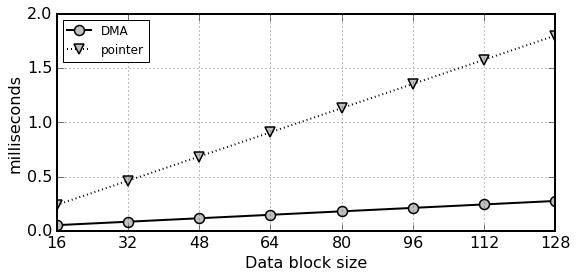

In [2]:
"""
DMA: Block size
    Metric : time
    Task   : Transfer block of data
    App    : TI APP


@ Author  : Amjad Yousef Majid
@ Gmail ID: amjad.y.majid 
@ Date    : 20/May/2017 
"""

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
% matplotlib inline

def executionTime(fh, diffs):
    numbers = []
    for num in fh:
        if num[-2:-1] == '1':
            #print(num)
            numbers.append( float(num.split(',')[0] ) )
    aDiff = 0
    for i in range(0, len(numbers)-1, 2):
        aDiff += (numbers[i+1] - numbers[i])
    aDiff *=1000  # make the diff in milliseconds
    
    
    diffs.append(aDiff / int(len(numbers)/2) )
#     print(diffs[:10])
#     exit()
    fh.close()

data_points =8

dma_diffs=[]
pt_diffs =[]

dmaSizes = [16, 32, 48, 64, 80, 96, 112, 128]
for f_idx in range(data_points):
    fh = open('../experiments_data/ipos-dma-size/dma{}.csv'.format(dmaSizes[f_idx]) , 'r')
    executionTime(fh, dma_diffs)
    
for f_idx in range(data_points):
    fh = open('../experiments_data/ipos-dma-size/whileBased/byte{}.csv'.format(dmaSizes[f_idx]) , 'r')
    executionTime(fh, pt_diffs)
    
    
#set figure linewidth
plt.rcParams['axes.linewidth']=2

#set graph line width
plt.rcParams['lines.linewidth'] = 2

#set font size for titles 
#plt.rcParams['axes.titlesize'] = 16

#set font size for labels on axes
plt.rcParams['axes.labelsize'] = 16

#set size of numbers on x-axis
plt.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
plt.rcParams['ytick.labelsize'] = 16

#set size of ticks on x-axis
plt.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
plt.rcParams['ytick.major.size'] = 7

#set size of markers, e.g., circles representing points
#set numpoints for legend
plt.rcParams['legend.numpoints'] = 1


f= plt.figure(figsize=(8,4) )
plt.plot(range(data_points),dma_diffs, 'k-o', 
         markeredgewidth = 1.5, markerfacecolor = '0.75',
         markeredgecolor = 'k', markersize = 10, label='DMA')

plt.plot(range(data_points),pt_diffs, 'k:v', 
         markeredgewidth = 1.5, markerfacecolor = '0.75',
         markeredgecolor = 'k', markersize = 10, label='pointer')

plt.xlabel('Data block size')
plt.ylabel('milliseconds')
plt.tight_layout()
plt.legend(loc='upper left')

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator(( range(9) ) ) )
ax.xaxis.set_major_formatter(ticker.FixedFormatter(dmaSizes) )
plt.grid(True)
f.savefig("../../../figures/dmaSize.eps",format="eps", dpi=1200)
plt.show()

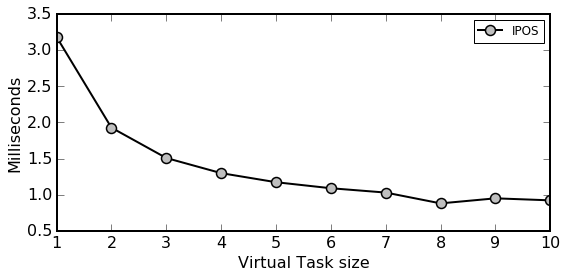

In [4]:
"""
Task Merging: 
    Metric  : time
    Task    : Merge Tasks
    App    : Data decompression


@ Author  : Amjad Yousef Majid
@ Gmail ID: amjad.y.majid 
@ Date    : 20/May/2017 
"""

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

% matplotlib inline

data_points =11

diffs=[]
for f_idx in range(1,data_points):

    fh = open('../experiments_data/task_merging/emptyTasks/VT_{}RT.csv'.format(f_idx) , 'r')
    numbers = []
    for num in fh:
        if num[-2:-1] == '1':
            #print(num)
            numbers.append( float(num.split(',')[0] ) )
    aDiff = 0
    for i in range(0, len(numbers)-1, 2):
        aDiff += (numbers[i+1] - numbers[i])
    aDiff *=1000  # make the diff in milliseconds
    
    diffs.append(aDiff / int(len(numbers)/2) )
#     print(diffs[:10])
#     exit()
    fh.close()
    
    
#set figure linewidth
plt.rcParams['axes.linewidth']=2

#set graph line width
plt.rcParams['lines.linewidth'] = 2

#set font size for titles 
#plt.rcParams['axes.titlesize'] = 16

#set font size for labels on axes
plt.rcParams['axes.labelsize'] = 16

#set size of numbers on x-axis
plt.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
plt.rcParams['ytick.labelsize'] = 16

#set size of ticks on x-axis
plt.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
plt.rcParams['ytick.major.size'] = 7

#set size of markers, e.g., circles representing points
#set numpoints for legend
plt.rcParams['legend.numpoints'] = 1


f= plt.figure(figsize=(8,4)  )
plt.plot(range(1,data_points),diffs, 'k-o', 
         markeredgewidth = 1.5, markerfacecolor = '0.75',
         markeredgecolor = 'k', markersize = 10, label='IPOS')

plt.xlabel('Virtual Task size')
plt.ylabel('Milliseconds')
plt.tight_layout()
plt.legend()

f.savefig("../../../figures/virtualTaskSize.eps",format="eps", dpi=1200)
plt.show()

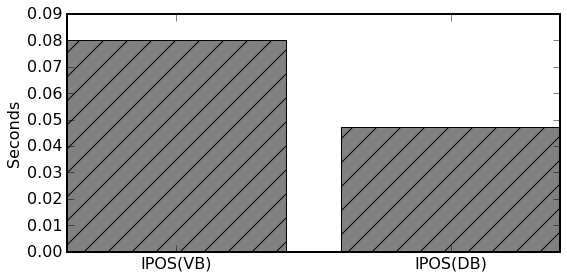

In [5]:
# virtualized Buffer Overhead
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

%matplotlib inline

# virtual buffer size
vbs = ['IPOS(VB)' ,'IPOS(DB)' ]

t_vbs_ipos = [0.08 , 0.047 ]
ipos_list = np.arange(len(t_vbs_ipos))

f = plt.figure(figsize=(8,4) )

ax = plt.axes()

ax.xaxis.set_major_locator(ticker.FixedLocator(( np.arange(len(vbs)) ) ) )
ax.xaxis.set_major_formatter(ticker.FixedFormatter((vbs)))
plt.ylabel('Seconds')
#plt.xlabel('')

plt.bar(ipos_list,  t_vbs_ipos, align = 'center', hatch = '/', color= '0.5' )

plt.tight_layout()
f.savefig("../../../figures/ipos_virtualizedBuffer_overhead.eps",format="eps", dpi=1200)
plt.show()